#### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import percentile
from scipy.stats import norm
from sklearn.neighbors import NearestNeighbors as kNN
from sklearn.neighbors import KNeighborsClassifier

In [3]:
Fraud = pd.read_csv('Fraud.csv',
                             delimiter=',', 
                             usecols = ['CASE_ID', 'FRAUD' , 'TOTAL_SPEND','DOCTOR_VISITS', 'NUM_CLAIMS', 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS'])


#### Percentage of fraudulent investigations

In [4]:
print("Percentage of fraudulent investigations is",round((sum(Fraud['FRAUD'] ==  1)/Fraud.shape[0] * 100), 4))

Percentage of fraudulent investigations is 19.9497


#### b) Boxplot for interval variables for fraudulent observations

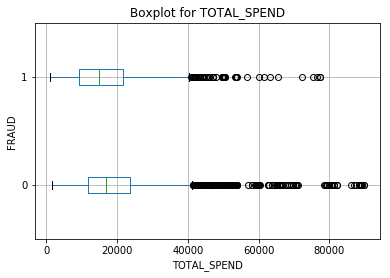

In [5]:
boxplot = Fraud.boxplot(column=['TOTAL_SPEND'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for TOTAL_SPEND")
plt.xlabel("TOTAL_SPEND")
plt.ylabel("FRAUD")
plt.show()

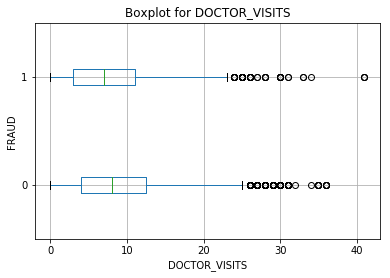

In [6]:
boxplot = Fraud.boxplot(column=['DOCTOR_VISITS'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for DOCTOR_VISITS")
plt.xlabel("DOCTOR_VISITS")
plt.ylabel("FRAUD")
plt.show()


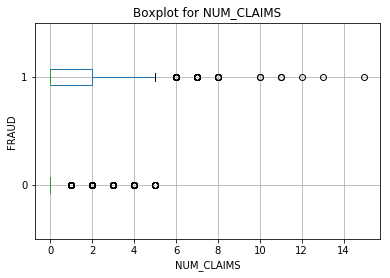

In [7]:
boxplot = Fraud.boxplot(column=['NUM_CLAIMS'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for NUM_CLAIMS")
plt.xlabel("NUM_CLAIMS")
plt.ylabel("FRAUD")
plt.show()


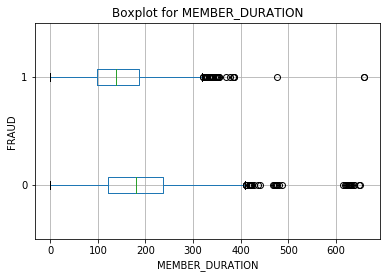

In [8]:
boxplot = Fraud.boxplot(column=['MEMBER_DURATION'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for MEMBER_DURATION")
plt.xlabel("MEMBER_DURATION")
plt.ylabel("FRAUD")
plt.show()


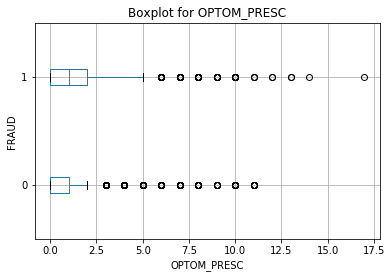

In [9]:
boxplot = Fraud.boxplot(column=['OPTOM_PRESC'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for OPTOM_PRESC")
plt.xlabel("OPTOM_PRESC")
plt.ylabel("FRAUD")
plt.show()


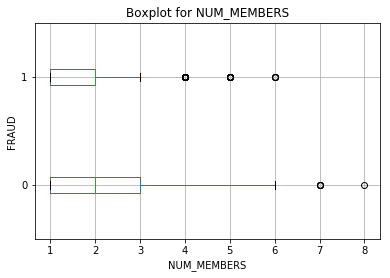

In [10]:
boxplot = Fraud.boxplot(column=['NUM_MEMBERS'], by=['FRAUD'], figsize=(6,4), vert=False)
plt.suptitle("")
plt.title("Boxplot for NUM_MEMBERS")
plt.xlabel("NUM_MEMBERS")
plt.ylabel("FRAUD")
plt.show()

#### Orthonormalizing interval variables 

In [11]:
fraud_wIndex = Fraud.set_index("CASE_ID")

In [12]:
trainData = fraud_wIndex[['TOTAL_SPEND','DOCTOR_VISITS', 'NUM_CLAIMS', 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]


In [13]:
x = np.matrix(trainData.values)
xtx = x.transpose() * x
print("t(x) * x = \n", xtx)

t(x) * x = 
 [[2812184770000    1040176400      42913200   20404919400     134771800
      220035900]
 [   1040176400        788159         23809      10264845         57654
         106717]
 [     42913200         23809          7922        448090          3459
           4765]
 [  20404919400      10264845        448090     232422585       1163391
        2121127]
 [    134771800         57654          3459       1163391         24460
          13581]
 [    220035900        106717          4765       2121127         13581
          29423]]


#### Calculating Eigenvalues

In [14]:
evals, evecs = np.linalg.eigh(xtx)
print("Eigenvalues of x = \n", evals)
print("Eigenvectors of x = \n",evecs)

Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]
Eigenvectors of x = 
 [[-5.37750046e-06 -2.20900379e-05  3.62806809e-05 -1.36298664e-04
  -7.26453432e-03  9.99973603e-01]
 [ 6.05433402e-03 -2.69942162e-02  1.27528313e-02  9.99013423e-01
   3.23120126e-02  3.69879256e-04]
 [-9.82198935e-01  1.56454700e-01 -1.03312781e-01  1.14463687e-02
   1.62110700e-03  1.52596881e-05]
 [ 1.59310591e-04 -4.91894718e-03  3.11864824e-03 -3.25018102e-02
   9.99428355e-01  7.25592222e-03]
 [ 6.90939783e-02 -2.10615119e-01 -9.75101628e-01  6.26672294e-03
   2.19857585e-03  4.79234486e-05]
 [ 1.74569737e-01  9.64577791e-01 -1.95782843e-01  2.73038995e-02
   6.21788707e-03  7.82430481e-05]]


#### Transformation Matrix

In [15]:
transf = evecs * np.linalg.inv(np.sqrt(np.diagflat(evals)));
print("Transformation Matrix = \n", transf)

Transformation Matrix = 
 [[-6.49862374e-08 -2.41194689e-07  2.69941036e-07 -2.42525871e-07
  -7.90492750e-07  5.96286732e-07]
 [ 7.31656633e-05 -2.94741983e-04  9.48855536e-05  1.77761538e-03
   3.51604254e-06  2.20559915e-10]
 [-1.18697179e-02  1.70828329e-03 -7.68683456e-04  2.03673350e-05
   1.76401304e-07  9.09938972e-12]
 [ 1.92524315e-06 -5.37085514e-05  2.32038406e-05 -5.78327741e-05
   1.08753133e-04  4.32672436e-09]
 [ 8.34989734e-04 -2.29964514e-03 -7.25509934e-03  1.11508242e-05
   2.39238772e-07  2.85768709e-11]
 [ 2.10964750e-03  1.05319439e-02 -1.45669326e-03  4.85837631e-05
   6.76601477e-07  4.66565230e-11]]


In [16]:
transf_x = x * transf;
print("The Transformed x = \n", transf_x)


The Transformed x = 
 [[ 5.96859502e-03  1.02081629e-02 -6.64664861e-03  1.39590283e-02
   9.39352141e-03  6.56324665e-04]
 [-2.09672310e-02  5.01932025e-03  8.51930607e-04  5.16174400e-03
   1.22658834e-02  7.75702220e-04]
 [ 7.64597676e-03  1.97528525e-02 -7.38335310e-03 -1.71350853e-03
   1.50348109e-02  8.95075830e-04]
 ...
 [-7.18408819e-05 -1.62580211e-02  2.75078514e-02 -7.13245766e-03
  -4.74021952e-02  5.31896971e-02]
 [-1.80147801e-04 -1.62154130e-02  2.76213381e-02 -9.17125411e-03
  -4.76625006e-02  5.35474776e-02]
 [-2.21157680e-03 -2.73884697e-02  2.93391341e-02 -7.81347172e-03
  -4.70861917e-02  5.36071324e-02]]


#### Identity Matrix check

In [17]:
show = np.matmul(transf_x.transpose(), transf_x)
print("Expect an Identity Matrix = \n", show)

Expect an Identity Matrix = 
 [[ 1.00000000e+00 -2.99781901e-16 -4.56882795e-16  5.45884952e-15
   1.20129601e-15 -1.27176915e-16]
 [-2.99781901e-16  1.00000000e+00 -6.56592836e-16 -2.76891140e-14
  -1.22818422e-15  7.71951947e-16]
 [-4.56882795e-16 -6.56592836e-16  1.00000000e+00  3.50110566e-15
   1.14491749e-16 -2.32452946e-16]
 [ 5.45884952e-15 -2.76891140e-14  3.50110566e-15  1.00000000e+00
   1.14825684e-14 -3.47768689e-15]
 [ 1.20129601e-15 -1.22818422e-15  1.14491749e-16  1.14825684e-14
   1.00000000e+00 -6.27969898e-16]
 [-1.27176915e-16  7.71951947e-16 -2.32452946e-16 -3.47768689e-15
  -6.27969898e-16  1.00000000e+00]]


#### Model building

In [18]:
target = fraud_wIndex['FRAUD']
trnsfData = pd.DataFrame(transf_x)
trnsfData.describe()

,0,1,2,3,4,5
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.000141,0.002146,-0.001655,0.001111,0.004857,0.011096
std,0.012954,0.012775,0.012848,0.012907,0.012009,0.006683
min,-0.169320,-0.037256,-0.118887,-0.037323,-0.053212,0.000656
25%,0.001591,-0.006644,-0.005818,-0.008009,-0.001971,0.006619
50%,0.003820,0.001066,0.000984,-0.000490,0.004961,0.009721
75%,0.005824,0.009828,0.006139,0.008068,0.012597,0.013894
max,0.018743,0.069159,0.029339,0.063347,0.058508,0.053607


In [19]:
neigh = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')

In [20]:
nbrs = neigh.fit(trnsfData, np.ravel(target))
nbrs

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
distances, indices = nbrs.kneighbors(trnsfData)

#### Score function

In [23]:
score_result = nbrs.score(trnsfData, target)
print("Score result", score_result)

Score result 0.8778523489932886


#### Finding neighbours 

In [24]:
focal = [[7500,15,3,127,2,2]]
transf_focal = focal * transf
transf_focal

matrix([[-0.02886529,  0.00853837, -0.01333491,  0.0176811 ,  0.00793805,
          0.0044727 ]])

In [25]:
dist_focal, indices_focal = nbrs.kneighbors(transf_focal)

In [26]:
myNeighbors_t = nbrs.kneighbors(transf_focal, return_distance = False)
print("My Neighbors = \n", myNeighbors_t)

My Neighbors = 
 [[ 588 2897 1199 1246  886]]


In [27]:
for i in indices_focal:
    print("Neighbor Value: \n", transf_x[i])
    print("Indices and FRAUD: \n", target.iloc[i])

neighborFeatures = x[(588, 2897, 1199, 1246, 886), :]
t_neighborFeatures = transf_x[(588, 2897, 1199, 1246, 886), :]
print(neighborFeatures)
print(t_neighborFeatures)

Neighbor Value: 
 [[-0.02886529  0.00853837 -0.01333491  0.0176811   0.00793805  0.0044727 ]
 [-0.0283266   0.00228388 -0.01756998  0.0198648   0.00329596  0.00954122]
 [-0.03107001 -0.00273018 -0.01117809  0.01897731  0.0056384   0.00596341]
 [-0.02709283  0.01943824 -0.01443816  0.01398229  0.00492734  0.00608264]
 [-0.02920401  0.00634252 -0.00413274  0.02751824  0.01109711  0.00530768]]
Indices and FRAUD: 
 CASE_ID
589     1
2898    1
1200    1
1247    1
887     1
Name: FRAUD, dtype: int64
[[ 7500    15     3   127     2     2]
 [16000    18     3   146     3     2]
 [10000    16     3   124     2     1]
 [10200    13     3   119     2     3]
 [ 8900    22     3   166     1     2]]
[[-0.02886529  0.00853837 -0.01333491  0.0176811   0.00793805  0.0044727 ]
 [-0.0283266   0.00228388 -0.01756998  0.0198648   0.00329596  0.00954122]
 [-0.03107001 -0.00273018 -0.01117809  0.01897731  0.0056384   0.00596341]
 [-0.02709283  0.01943824 -0.01443816  0.01398229  0.00492734  0.00608264]
 [-0.

#### Predicted probability of fraudulent


In [28]:
class_prob = nbrs.predict_proba(t_neighborFeatures)
#prediction = nbrs.predict(trnsfData)
print("Predicted Probability\n" ,class_prob)

Predicted Probability
 [[0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]]


In [30]:
probOfNotFraud = np.mean(class_prob[0])
probOfFraud = np.mean(class_prob[1])
if probOfFraud >= 0.19:
    print("Fraud")
else:
    print('Not Fraud')

Fraud


 #### Misclassifcation rate - ( generic function )

In [ ]:
targetClass = [0, 1]

nMissClass = 0
for i in range(fraud_wIndex.shape[0]):
    j = np.argmax(class_prob[i][:])
    predictClass = targetClass[j]
    if (predictClass != target.iloc[i]):
        nMissClass += 1

print("MissClass", nMissClass)

rateMissClass = nMissClass / fraud_wIndex.shape[0]
print('Misclassification Rate = ', rateMissClass)